   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Missing values:
 age         0
sex         0
bmi         0
children    0
s

<ipython-input-1-3f3152888a94>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
<ipython-input-1-3f3152888a94>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
<ipython-input-1-3f3152888a94>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-

------Using RandomForestRegressor------
R² for Train: 0.9772612152330278
R² for Test: 0.8379198591254433
MSE Train: 3310236.335727301
MSE Test: 24341319.02581295
MAE Train: 1009.7700596514948
MAE Test: 2752.505484245075
Predicted Insurance Cost (USD): 3939.0780467765217


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


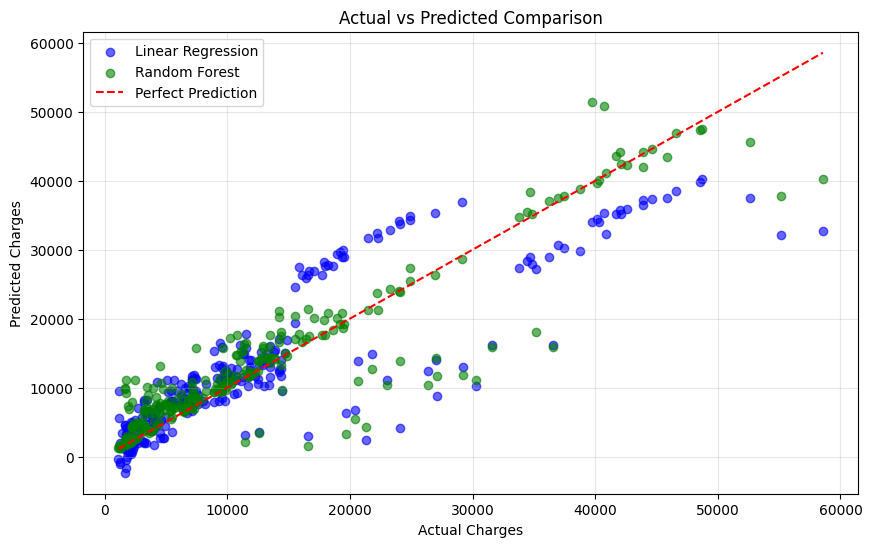

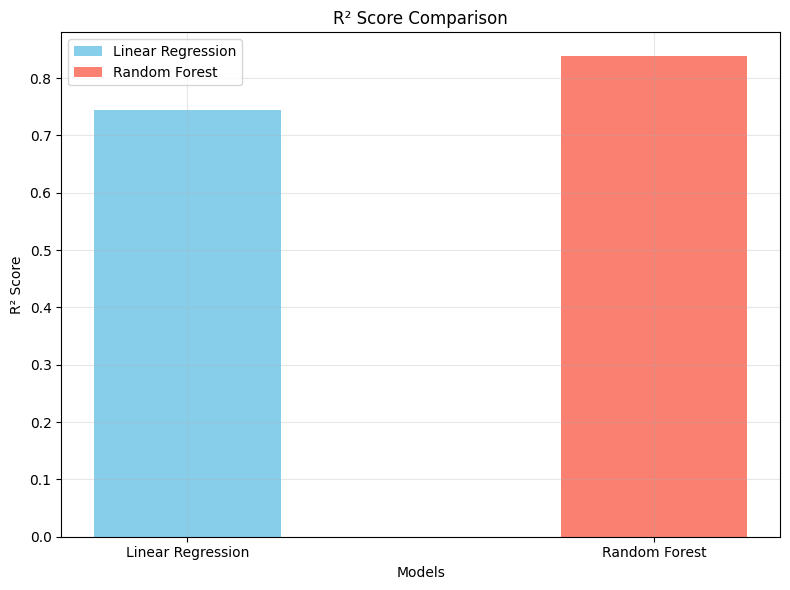

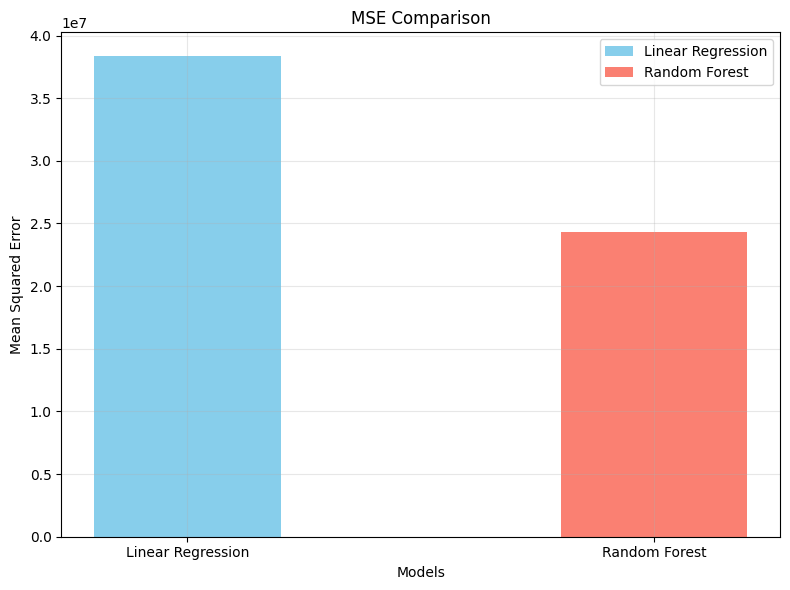

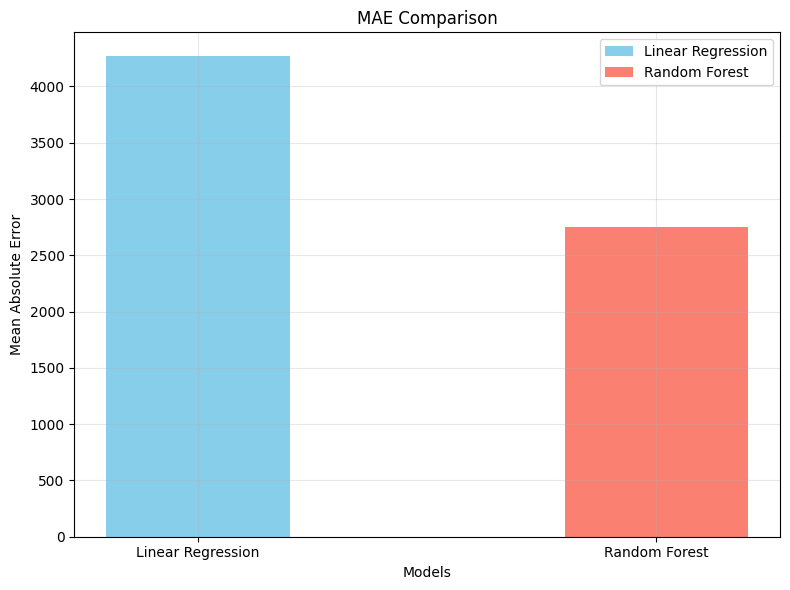

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
insurance_dataset = pd.read_csv('/content/insurance.csv')

# Display first 5 rows
print(insurance_dataset.head())

# Shape of the dataset
print("Shape:", insurance_dataset.shape)

# Info about the dataset
print(insurance_dataset.info())

# Check for missing values
print("Missing values:\n", insurance_dataset.isnull().sum())

# Statistical summary
print(insurance_dataset.describe())

# Encoding categorical columns
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Splitting features and target
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

print("Features:\n", X)
print("Target:\n", Y)

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("Shapes - X:", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape)

# Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predictions
train_data_prediction = regressor.predict(X_train)
test_data_prediction = regressor.predict(X_test)

# R² scores
r2_train = r2_score(Y_train, train_data_prediction)
r2_test = r2_score(Y_test, test_data_prediction)

print("------Using LinearRegression------")
print("R² for Train:", r2_train)
print("R² for Test:", r2_test)

# MSE and MAE
mse_train1 = mean_squared_error(Y_train, train_data_prediction)
mse_test1 = mean_squared_error(Y_test, test_data_prediction)
mae_train1 = mean_absolute_error(Y_train, train_data_prediction)
mae_test1 = mean_absolute_error(Y_test, test_data_prediction)

print("MSE Train:", mse_train1)
print("MSE Test:", mse_test1)
print("MAE Train:", mae_train1)
print("MAE Test:", mae_test1)
print("Model Coefficients:", regressor.coef_)
print("Model Intercept:", regressor.intercept_)

# Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, Y_train)

y_pred_train = random_forest_regressor.predict(X_train)
y_pred_test = random_forest_regressor.predict(X_test)

# R² scores for Random Forest
r2_train_rf = r2_score(Y_train, y_pred_train)
r2_test_rf = r2_score(Y_test, y_pred_test)

print("------Using RandomForestRegressor------")
print("R² for Train:", r2_train_rf)
print("R² for Test:", r2_test_rf)

# MSE and MAE for Random Forest
mse_train_rf = mean_squared_error(Y_train, y_pred_train)
mse_test_rf = mean_squared_error(Y_test, y_pred_test)
mae_train_rf = mean_absolute_error(Y_train, y_pred_train)
mae_test_rf = mean_absolute_error(Y_test, y_pred_test)

print("MSE Train:", mse_train_rf)
print("MSE Test:", mse_test_rf)
print("MAE Train:", mae_train_rf)
print("MAE Test:", mae_test_rf)

# Prediction for new data
input_data = (32, 0, 25.6, 0, 1, 0)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
prediction = regressor.predict(input_data_as_numpy_array)
print("Predicted Insurance Cost (USD):", prediction[0])

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(Y_test, y_pred_test, color='green', alpha=0.6, label='Random Forest')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Perfect Prediction')
plt.title("Actual vs Predicted Comparison")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Bar Plot: R² Score Comparison
plt.figure(figsize=(8, 6))
x = np.arange(2)
width = 0.4
plt.bar(x[0], r2_test, width, label="Linear Regression", color="skyblue")
plt.bar(x[1], r2_test_rf, width, label="Random Forest", color="salmon")
plt.title("R² Score Comparison")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.xticks(x, ["Linear Regression", "Random Forest"])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Bar Plot: MSE Comparison
plt.figure(figsize=(8, 6))
plt.bar(x[0], mse_test1, width, label="Linear Regression", color="skyblue")
plt.bar(x[1], mse_test_rf, width, label="Random Forest", color="salmon")
plt.title("MSE Comparison")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.xticks(x, ["Linear Regression", "Random Forest"])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Bar Plot: MAE Comparison
plt.figure(figsize=(8, 6))
plt.bar(x[0], mae_test1, width, label="Linear Regression", color="skyblue")
plt.bar(x[1], mae_test_rf, width, label="Random Forest", color="salmon")
plt.title("MAE Comparison")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.xticks(x, ["Linear Regression", "Random Forest"])
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
